<a href="https://colab.research.google.com/github/JoaoVerao/DIO-Reducao-de-Dimensionalidade-em-Imagens-para-Redes-Neurais/blob/main/Redutor_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
import io
import urllib

In [2]:
#Carrega imagem
url = "https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEhyIFoXctNy2px-aYs8bwMyNgPflBXZ-blsQdBr8kDD_COAn_1dc6Mbb4821BxhydNeCj_PegnuRYfT3Phai00KVLexKlwVWMBOlqi9VDIYBmiwOOnO8G2ovnK8L61Zn4SEDMZTEAE_afSC5Mym0AZAjNr93BWCoFb48tXGeeGT9am9sy7epASkRdfhrbB6/s512/lenna.jpg"
imagem = Image.open(io.BytesIO(urllib.request.urlopen(url).read()))

#Converte para RGB
imagem_rgb = imagem.convert("RGB")

#Converte para um array
matriz_rgb = np.array(imagem_rgb)

In [3]:
#Separando em R, G e B
matriz_r = matriz_rgb[:,:,0]
matriz_g = matriz_rgb[:,:,1]
matriz_b = matriz_rgb[:,:,2]


In [4]:
#Converter em matriz com pesos iguais
matriz_c_proporcional = matriz_r * (1/3) + matriz_g * (1/3) + matriz_b * (1/3)

In [5]:
#Converter matriz cinza em binaria
matriz_binaria = matriz_c_proporcional.copy()
for i in range(len(matriz_c_proporcional)):
  for j in range(len(matriz_c_proporcional[i])):
    if matriz_c_proporcional[i][j] <= 135:
      celula = 0
    else:
      celula = 255
    matriz_binaria[i][j] = celula


In [6]:
#Garante que os ms valores sejam inteiros entre 0 e 255
matriz_c_proporcional = np.clip(matriz_c_proporcional, 0, 255)
matriz_proporcional_tratada = matriz_c_proporcional.astype(np.uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

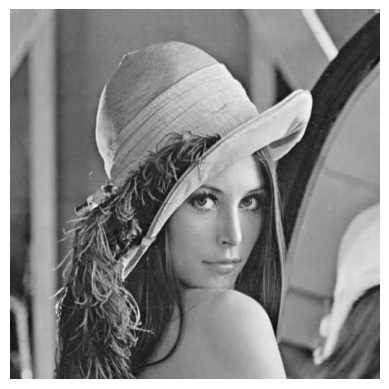

In [7]:
#Exibir a imagem em tons de cinza usando o matplotlib
plt.imshow(matriz_proporcional_tratada, cmap='gray')
plt.axis('off')
plt.show

In [8]:
#Garante que os ms valores sejam inteiros entre 0 e 255
matriz_binaria = np.clip(matriz_binaria, 0, 255)
matriz_binaria_tratada = matriz_binaria.astype(np.uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

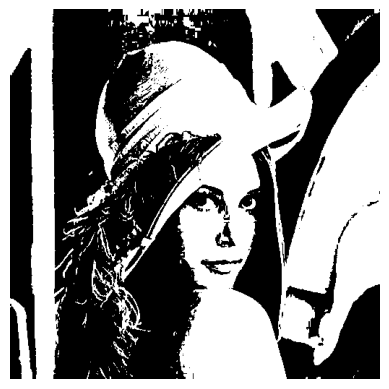

In [9]:
#Exibir a imagem em tons de cinza usando o matplotlib
plt.imshow(matriz_binaria_tratada, cmap='binary_r')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

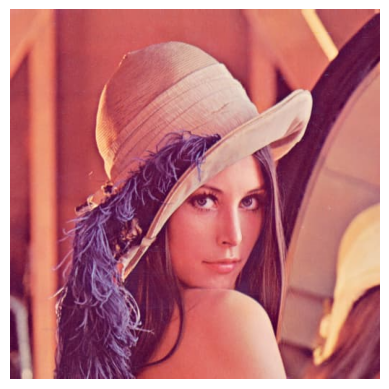

In [10]:
plt.imshow(matriz_rgb)
plt.axis('off')
plt.show